# Simulation and Modeling of Natural Processes

## Markov-Chain Monte-Carlo

_Considering a stochastic process whose goal is to explore the state space of a system of interest._

In other words, there's a system let's say a gas in a chamber, there's a stochastic processes associated with it. Since the molecules move at random, they can move to any direction and we want to explore the probability of them moving from $x$ position to $x'$ position. 

That probability can be denoted by $W_{x\rightarrow x'}$, and the advancement of the system from $t$ to $t + 1$ is what it makes a Markov Chain. 

We want to sample a prescribed probability $p(t,x)$, the process should be at point $x$ at time $t$ with a probablity of $p(t, x)$. So, in other words, we want count as a "success" if we can find a $W_{x\rightarrow x'}$ which results in $p$ at position $x$ at time $t$, is that it?


_Sampling the diffusion equation in 1D_ (Monte-Carlo)

The probability that our random exportation is at location $x$ at time $t $ is

$$p(t + 1, x) = \sum_{x'}p(t, x')W_{x'\rightarrow x}$$

* Let us consider a 1D discrete space: $x\in \mathbb{Z} $
* where one can move to the right with probability $W_{+}$, to the left with probability $W_{-}$ and stay still wiht probability $W_{0}$.
* The equation for $p(t,x)$ simplifies to:

$$p(t + 1, x) = p(t, x - 1)W_{+} + p(t, x)W_{0} + p(t, x + 1)W_{-}$$


## Dynamical System

* A system that varies through time.

### Two types of dynamic systems

* Discrete and Continous

$$\dot{s} \equiv \frac{ds}{dt} = f(x)$$

## Random Walk

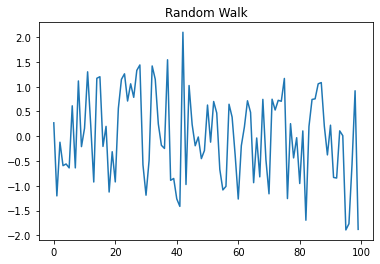

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rndgen = np.random.default_rng()
random_walk = rndgen.standard_normal(100)

plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

### Brownian Motion

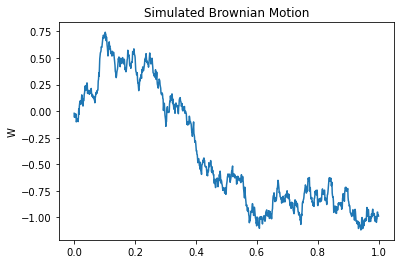

In [2]:
def brownian_motion(T, N):
    W0 = 0
    dt = T/N
    increments = np.random.normal(0, 1 * np.sqrt(dt), N)
    W = W0 + np.cumsum(increments)
    return W

T = 1
N = 10**3
dt = T / float(N)
t = np.linspace(0., N * dt, N)

W = brownian_motion(T, N)
plt.plot(t, W)
plt.ylabel('W')
plt.title('Simulated Brownian Motion')
plt.show()

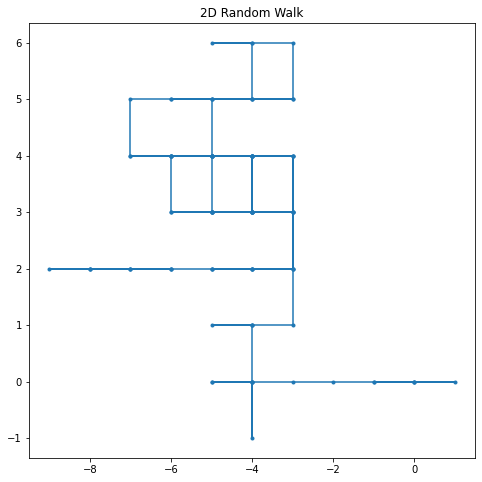

In [156]:
import random as rnd

def step():
    Δt = 1
    choices = (-Δt, 0, Δt)
    v_x = rnd.choice(choices)
    if v_x == 0:
        v_y = rnd.choice(choices)
    else:
        v_y = 0
    return (v_x, v_y)


def experiment():
    x, y = np.array([0]), np.array([0])
    
    for t in range(1 , 100):
        v_x, v_y = step()
        x = np.append(x, x[t - 1] + Δt * v_x)
        y = np.append(y, y[t - 1] + Δt * v_y)
        
    return (x, y)


x, y = experiment()

plt.figure(figsize=(8,8))
plt.title('2D Random Walk')
plt.axis('on')
plt.plot(x, y, marker='.')
plt.show()

## Random Walk Displacement

We start with the [_Eucledian Distance_](https://en.wikipedia.org/wiki/Euclidean_distance) (which is derived of using _Pythagoras_ on cartesian coordinates).

$$d(t) = \sqrt{\langle(x(t) - x_0)^2\rangle + \langle(y(t) - y_0)^2\rangle}$$



d=8.17


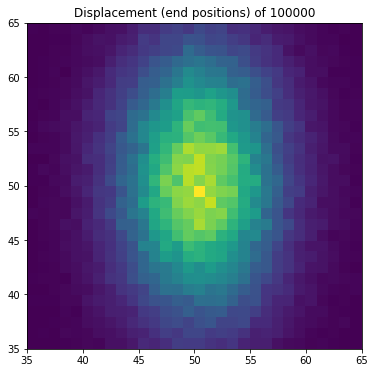

In [175]:
matrix = np.ones([100, 100])

d = 0
iterations = 100000

for _ in range(iterations):
    x, y = experiment()
    # count the final position offset by 50
    matrix[x[-1] + 50][y[-1] + 50] += 1
    d += np.sqrt(x[-1]**2 + y[-1]**2)

print(f'd={d/iterations:.2f}')
plt.figure(figsize=(6, 6))
plt.title(f'Displacement (end positions) of {iterations}')
plt.pcolormesh(matrix)
plt.margins(-0.35)
plt.show()